#  

In [2]:
# 모듈로딩
import os
import torch
from torch import nn # 신경망 모듈
from torch.utils.data import DataLoader # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms # torch저장소 데이터셋 모듈

## [1] 데이터 준비

In [3]:
# tensor의 저장소 설정을 위한 체크
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## [2] NN(뉴런 네트워크) 모델 생성

In [7]:
# 순차적인 Layer(레이어) 구성 => Sequential, Layer, ...
class NeuralNetwork(nn.Module):
    # 생성자 메서드, NeuralNetwork() 객체 생성 시 실행
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 입력층 (input_dim, output_dim)
            nn.ReLU(), # 은닉층 (input_dim, output_dim)
            nn.Linear(512, 512), # 은닉층 (input_dim, output_dim)
            nn.ReLU(), # 은닉층 (input_dim, output_dim)
            nn.Linear(512, 10) # 출력층 (input_dim, output_dim)
        )
    
    # NN 모델이 동작을 시작할 때 실행
    def forward(self, x):
        x = self.flatten(x) # 1차원으로 데이터 변환
        logits = self.linear_relu_stack(x) # NN 모델에 데이터 전달
        return logits

In [8]:
# NN 모델 생성
mnistM=NeuralNetwork()

In [9]:
# NN 모델 생성
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [22]:
# 데이터 준비
X = torch.rand(1, 28, 28, device=device)
print(f"X => {X}")

# sample은 1개 행은 28개 열은 28개

X => tensor([[[0.2570, 0.8733, 0.4228, 0.9735, 0.3401, 0.0339, 0.7689, 0.1388,
          0.4084, 0.8254, 0.7946, 0.3496, 0.0347, 0.0938, 0.2394, 0.9101,
          0.0543, 0.7686, 0.9495, 0.2579, 0.1524, 0.0625, 0.8827, 0.6260,
          0.5596, 0.0211, 0.3221, 0.7964],
         [0.3549, 0.9228, 0.5529, 0.7437, 0.2972, 0.3324, 0.0854, 0.3124,
          0.4474, 0.4106, 0.7356, 0.1326, 0.2916, 0.8207, 0.9662, 0.1065,
          0.7865, 0.9026, 0.3020, 0.0485, 0.4716, 0.1795, 0.8297, 0.7736,
          0.0278, 0.2836, 0.6438, 0.4917],
         [0.0492, 0.7991, 0.9315, 0.5761, 0.3173, 0.6088, 0.8778, 0.7980,
          0.4604, 0.9073, 0.8020, 0.2082, 0.2170, 0.7406, 0.4921, 0.6859,
          0.9899, 0.4369, 0.6052, 0.6470, 0.6579, 0.1200, 0.6457, 0.9476,
          0.2509, 0.8389, 0.6139, 0.1281],
         [0.5872, 0.0133, 0.7653, 0.7269, 0.6679, 0.1450, 0.0534, 0.0977,
          0.7927, 0.3959, 0.0788, 0.9715, 0.9139, 0.9546, 0.6627, 0.2163,
          0.2102, 0.7491, 0.9652, 0.9339, 0.1577, 0.

In [23]:
# 모델 학습
logits=model(X)

In [29]:
print(f"학습결과 -----------------\n{logits}\n{logits.shape}")

학습결과 -----------------
tensor([[ 0.0696,  0.0919, -0.1209, -0.0188,  0.0205,  0.0591,  0.0031, -0.0220,
         -0.0158, -0.1173]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [25]:
# 결과 분석
pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab: {pred_probab}")
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

pred_probab: tensor([[0.1075, 0.1099, 0.0889, 0.0984, 0.1023, 0.1064, 0.1006, 0.0981, 0.0987,
         0.0892]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([1])


In [26]:
import matplotlib.pyplot as plt

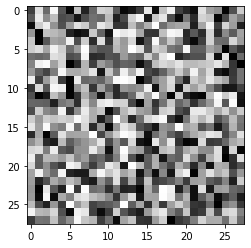

In [27]:
plt.imshow(X.reshape(28,28),cmap='gray')
plt.show()

## [3] MNIST 데이터 불러오기

In [ ]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

In [30]:
# MNIST 데이터 => train,훈련
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [31]:
type(training_data),training_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([60000, 28, 28]))

In [32]:
type(test_data),test_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([10000, 28, 28]))

In [33]:
# 데이터 타겟 정보
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])
img => torch.Size([1, 28, 28])
img => torch.Size([28, 28])


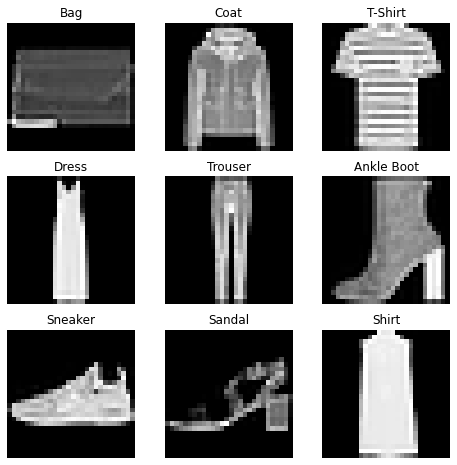

In [37]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(f"img => {img.shape}")
    a=img.squeeze()
    print(f"img => {a.shape}")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()